# Pymaceuticals Inc.
---

### Analysis

Observations and Inferences:

1. **Tumor Volume Distribution Across Treatments:**
   The box plot representing the distribution of final tumor volumes across different treatment regimens (Capomulin, Ramicane, Infubinol, and Ceftamin) reveals that Capomulin and Ramicane exhibit lower median final tumor volumes compared to Infubinol and Ceftamin. This suggests that Capomulin and Ramicane treatments may be more effective in reducing tumor sizes, as indicated by their lower median values.

2. **Capomulin On A Single Mouse:**
   The lineplot for tumor volume over time for a mouse on capomulin suggests a significant impact, in that, Capomulin is rather effective on tumors. This would, however, require observation of more mice under the same treatment assuming all other factors are controlled.  

3. **Correlation Between Mouse Weight and Tumor Volume in Capomulin Treatment:**
   The scatter plot with a superimposed linear regression line illustrates a positive correlation between mouse weight and average tumor volume within the Capomulin treatment regimen. The calculated correlation coefficient of the regression model reinforces this positive relationship. This implies that, on average, mice with higher weights tend to have larger tumor volumes when undergoing Capomulin treatment.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='inner')

# Display the data table for preview
df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [2]:
# Checking the number of mice.
len(df['Mouse ID'].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_pairs = df[df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]

unique_values_of_MouseID = duplicate_pairs['Mouse ID'].unique()

print(unique_values_of_MouseID)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
df[df['Mouse ID'] == 'g989']

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1  
918           56.045564                 1  
919           59.082294                 1  
920           62.570880                 2

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_ = df[df['Mouse ID'] != 'g989']
df_.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [6]:
# Checking the number of mice in the clean DataFrame.
len(df_['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_statistics = df.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
})

# Rename the columns for clarity
summary_statistics.columns = [
    'Mean Tumor Volume',
    'Median Tumor Volume',
    'Tumor Volume Variance',
    'Tumor Volume Std. Dev.',
    'Tumor Volume Std. Err.'
]

summary_statistics

Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.322552            50.854632              42.351070   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.507770                0.512884  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
ss_2 = df.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
})

ss_2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel="'# of Observed Mouse Timepoints">

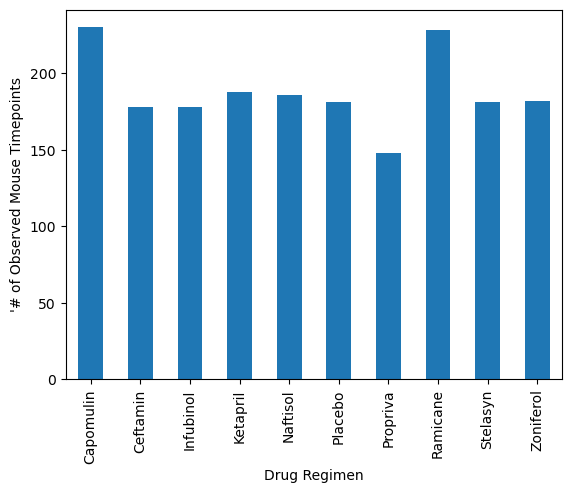

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
df_[['Drug Regimen','Mouse ID', 'Timepoint']].groupby('Drug Regimen').count().drop(columns=['Mouse ID']).plot(kind='bar', legend=False, ylabel="'# of Observed Mouse Timepoints")

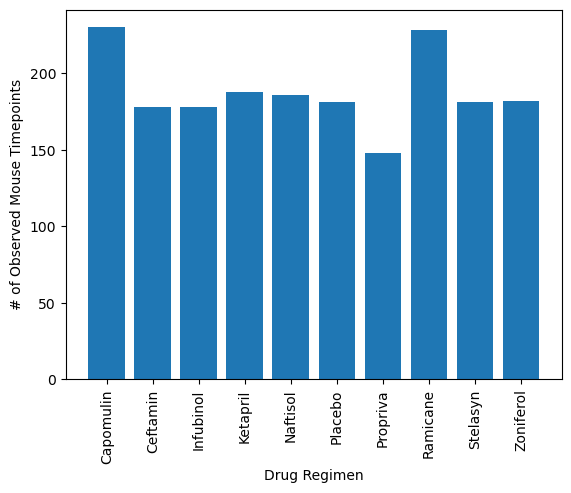

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
grouped_df = df_[['Drug Regimen', 'Mouse ID', 'Timepoint']].groupby('Drug Regimen').count().drop(columns=['Mouse ID'])

drug_regimens = grouped_df.index
count_values = grouped_df['Timepoint']

plt.bar(drug_regimens, count_values)

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.xticks(rotation=90)

plt.show()

<Axes: ylabel='Sex'>

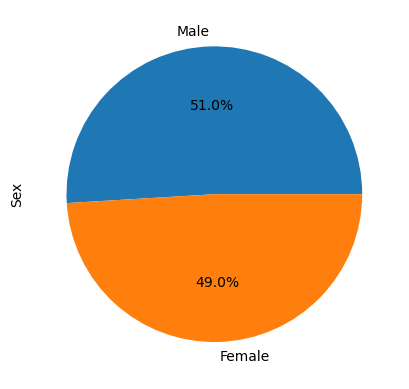

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_ = df_['Sex'].value_counts()

# Plot a pie chart using Pandas plot
sex_.plot.pie(autopct='%1.1f%%', ylabel='Sex')


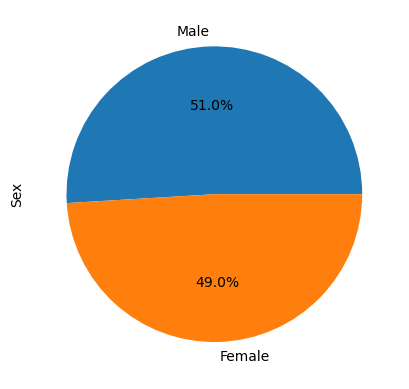

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import pandas as pd
import matplotlib.pyplot as plt

sex_.plot(kind='pie', autopct='%1.1f%%')

plt.ylabel("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
filtered_df = df_[df_['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
maxtimepoint = filtered_df.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(maxtimepoint, df_, on=['Mouse ID', 'Timepoint'], how='left')

merged_df.head()


Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0     a203         45    Infubinol  Female          20          23   
1     a251         45    Infubinol  Female          21          25   
2     a275         45     Ceftamin  Female          20          28   
3     a411         45     Ramicane    Male           3          22   
4     a444         45     Ramicane  Female          10          25   

   Tumor Volume (mm3)  Metastatic Sites  
0           67.973419                 2  
1           65.525743                 1  
2           62.999356                 3  
3           38.407618                 1  
4           43.047543                 0

In [38]:
last_timepoint_df = df_.groupby('Mouse ID')['Timepoint'].max().reset_index()

merged_df = pd.merge(last_timepoint_df, df_, on=['Mouse ID', 'Timepoint'], how='left')

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

tumor_vol_data = []

for treatment in treatments:
    treatment_df = merged_df[merged_df['Drug Regimen'] == treatment]
    
    vols = treatment_df['Tumor Volume (mm3)']
    
    tumor_vol_data.append(vols)
    
    quartiles = vols.quantile([0.25, 0.5, 0.75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    iqr = q3 - q1
    
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    
    outliers = treatment_df[(vols < lower) | (vols > upper)]
    
    print(f"Results for {treatment}:")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Potential Outliers: {outliers['Tumor Volume (mm3)'].tolist()}")
    print("\n")


Results for Capomulin:
IQR: 7.781863460000004
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential Outliers: []


Results for Ramicane:
IQR: 9.098536719999998
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential Outliers: []


Results for Infubinol:
IQR: 11.477135160000003
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential Outliers: [36.3213458]


Results for Ceftamin:
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential Outliers: []




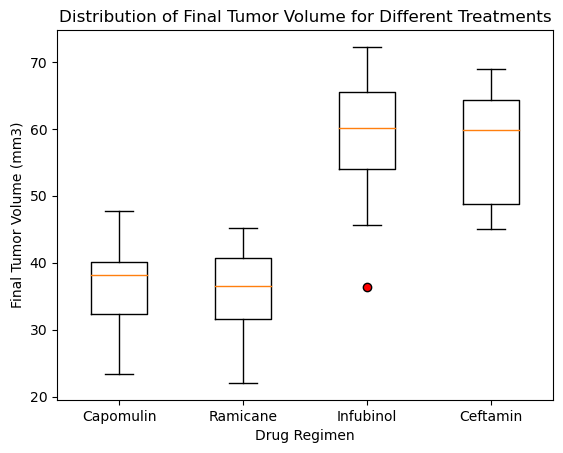

In [24]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.boxplot(tumor_vol_data, labels=treatments, flierprops={'marker': 'o', 'markerfacecolor': 'red'})

ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_title('Distribution of Final Tumor Volume for Different Treatments')

plt.show()

## Line and Scatter Plots

In [26]:
df_[df_['Drug Regimen'] == 'Capomulin']

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
10       s185    Capomulin  Female           3          17          0   
11       s185    Capomulin  Female           3          17          5   
12       s185    Capomulin  Female           3          17         10   
13       s185    Capomulin  Female           3          17         15   
14       s185    Capomulin  Female           3          17         20   
...       ...          ...     ...         ...         ...        ...   
440      i557    Capomulin  Female           1          24         45   
1452     r157    Capomulin    Male          22          25          0   
1453     r157    Capomulin    Male          22          25          5   
1454     r157    Capomulin    Male          22          25         10   
1455     r157    Capomulin    Male          22          25         15   

      Tumor Volume (mm3)  Metastatic Sites  
10             45.000000                 0  
11             43.878496                 0  
12             37.614948                 0  
13             38.177232                 0  
14             36.866876                 0  
...                  ...               ...  
440            47.685963                 1  
1452           45.000000                 0  
1453           45.597064                 0  
1454           46.059608                 0  
1455           46.539206                 0  

[230 rows x 8 columns]

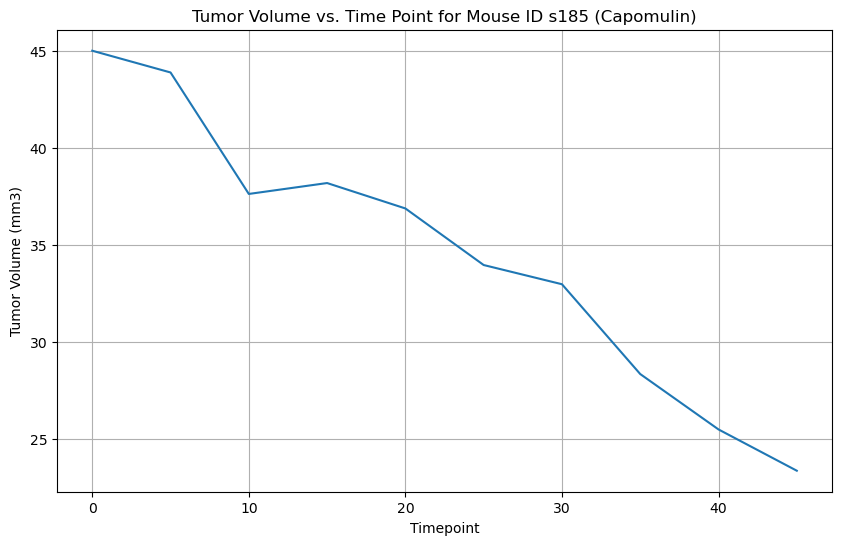

In [36]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_id = 's185'
capomulin_df = df_[(df_['Drug Regimen'] == 'Capomulin') & (df_['Mouse ID'] == mouse_id)]

plt.figure(figsize=(10, 6))
plt.plot(capomulin_df['Timepoint'], capomulin_df['Tumor Volume (mm3)'])

plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Time Point for Mouse ID {mouse_id} (Capomulin)')

plt.grid(True)
plt.show()

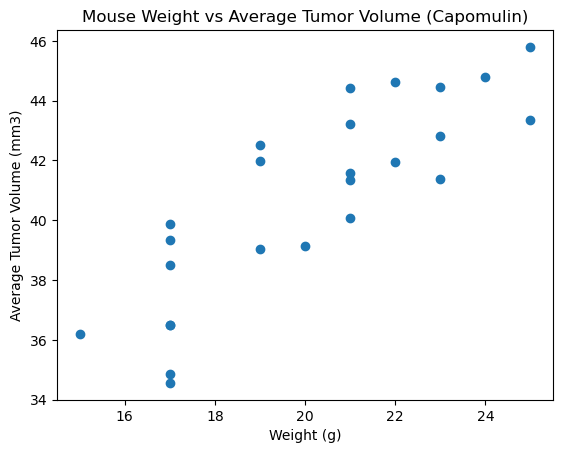

In [35]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_ = df_[df_['Drug Regimen'] == 'Capomulin']

avg_tum = capomulin_.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

mouse_weights = capomulin_.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(mouse_weights, avg_tum)

plt.title('Mouse Weight vs Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()


## Correlation and Regression

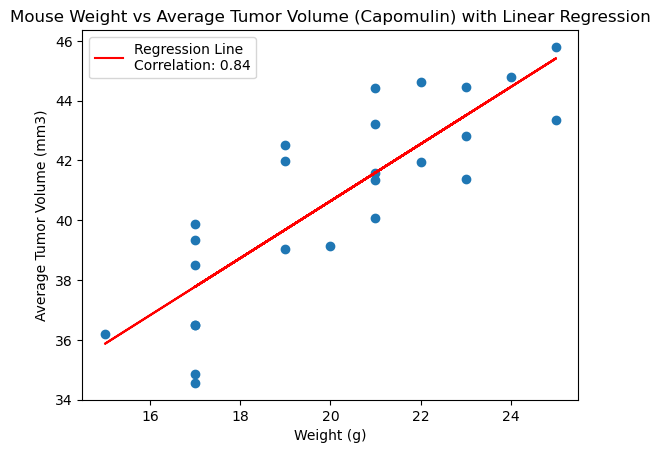

In [37]:
from scipy.stats import linregress

capomulin_ = df_[df_['Drug Regimen'] == 'Capomulin']

avg_tum = capomulin_.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

mouse_weights = capomulin_.groupby('Mouse ID')['Weight (g)'].mean()

correlation_coefficient = round(avg_tum.corr(mouse_weights), 2)

slope, intercept, r_value, p_value, std_err = linregress(mouse_weights, avg_tum)

plt.scatter(mouse_weights, avg_tum)

regression_line = slope * mouse_weights + intercept
plt.plot(mouse_weights, regression_line, color='red', label=f'Regression Line\nCorrelation: {correlation_coefficient}')

plt.title('Mouse Weight vs Average Tumor Volume (Capomulin) with Linear Regression')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.legend()

plt.show()